# Gerekli Kütüphanelerin Yüklenmesi

In [1]:
#Projede Veri Entegrasyonu, Veri Manipülasyonu, Veri Analizi ve Görselleştirme gibi işlemleri gerçekleştirmek amacıyla pandas kütüphanesi import edilmiştir.
import pandas as pd
import numpy as np

#Veri görselleştirme için kullanacağımız temel Python kütüphaneleridir.
import matplotlib.pyplot as plt
import seaborn as sns

# RandomForestClassifier algoritması import edilmiştir.
from sklearn.ensemble import RandomForestClassifier

#Elimizde bulunan tek data setini train ve test olarak ikiye ayırabilmek için sklearn kütüphanesinden train_test_split import edilmiştir.
from sklearn.model_selection import train_test_split

#Elimizdeki string tipinde bulunan verileri sayısal formata çevirmek için LabelEncoder import edilmiştir.
from sklearn.preprocessing import LabelEncoder

#Model değerlendirme için gerekli kütüphaneler import edilmiştir.
from sklearn.metrics import classification_report, confusion_matrix

#Çapraz doğrulama yapmak için cross_val_score import edilmiştir.
from sklearn.model_selection import cross_val_score

# Sentetik Veri Setinin Yüklenmesi


*   Uzaklık (km): Kullanıcının bulunduğu konum ile ATM arasındaki mesafeyi kilometre cinsinden belirtir. Kullanıcılar genellikle kendilerine yakın ATM'leri tercih eder, bu nedenle uzaklık önemli bir faktördür.

*   Bakım (Ay): ATM'nin son bakımının üzerinden geçen süreyi ay cinsinden gösterir. Bakımı düzenli yapılan ATM'lerin daha az arıza yapma olasılığı yüksektir, bu da kullanıcı deneyimini olumlu etkiler.

*   Döviz: ATM'nin döviz bozdurma hizmeti sunup sunmadığını belirtir. Evet/Hayır değeri alır. Döviz çekmek isteyen kullanıcılar için önemli bir kriterdir.

*   Çalışıyor mu?: ATM'nin şu anda çalışır durumda olup olmadığı bilgisini içerir. Evet/Hayır değeri alır. Çalışmayan bir ATM elbette önerilemez.

*   Arıza: Son bir ay içinde ATM'de kaç kez arıza raporu verildiğini gösterir. Arıza sayısı ne kadar fazlaysa, ATM'nin güvenilirliği o kadar düşük olur ve önerilme olasılığı azalır.

*   Yükleme (Gün Önce): ATM'ye son nakit yüklemesinin üzerinden kaç gün geçtiğini belirtir. Yakın zamanda nakit yüklenmiş bir ATM'nin nakitsiz kalma olasılığı daha düşüktür, bu da tercih edilme sebebidir.

*   Trafik: ATM'nin bulunduğu konumun yoğun saatlerde (mesai giriş/çıkış saatleri gibi) trafik yoğunluğu olup olmadığını belirtir. Evet/Hayır değeri alır. Yoğun trafik, ATM'ye ulaşımı zorlaştırabilir, bu yüzden bazı kullanıcılar için tercih edilmeyebilir.

*   Kullanıcı Puanı: ATM'yi daha önce kullanan kişilerin verdiği ortalama puanı gösterir. 2.5 ile 5 arasında bir değer alır. Yüksek puanlı ATM'ler genellikle daha iyi hizmet ve kullanıcı deneyimi sunar.







In [2]:
#Data değişkenine pandas kütüphanesi aracılığı ile elmizdeki datalar atanmıştır.
data = pd.read_csv("atm_data_10000.csv")

# Keşifsel Veri Analizi (EDA — Exploratory Data Analysis)
Pandas, matplotlib, seaborn gibi kütüphaneler kullanarak elimizdeki veri seti hakkında bilgilere ulaşılmış ve veri seti daha kolay gözlemlenebilir hale getirilmiştir

**Numerical EDA**

Öncelikle pandas kütüphanesi yardımı ile data setinin bir kısmını gözlemleyelim

In [3]:
#Veri setinin ilk 5 örneği tabloda listelenmiştir.
data.head()

,Distance,Maintenance,Currency,isWorking,isRecommended,Reports,Loading,Traffic,Rating
0,2.3,5,True,True,True,0,2,False,3.1
1,2.1,2,False,True,True,1,7,True,4.3
2,4.6,4,False,False,False,0,3,False,2.9
3,1.4,6,False,True,False,4,2,False,3.0
4,7.7,3,False,False,False,0,5,True,2.8


In [4]:
#Veri setinin son 5 örneği tabloda listelenmiştir.
data.tail()

,Distance,Maintenance,Currency,isWorking,isRecommended,Reports,Loading,Traffic,Rating
9995,1.6,4,False,False,False,4,6,False,2.8
9996,3.3,5,False,True,False,5,2,True,4.0
9997,4.9,4,False,False,False,4,5,True,3.9
9998,1.1,6,True,True,True,1,5,False,3.6
9999,6.6,2,True,True,True,4,3,True,3.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       10000 non-null  float64
 1   Maintenance    10000 non-null  int64  
 2   Currency       10000 non-null  bool   
 3   isWorking      10000 non-null  bool   
 4   isRecommended  10000 non-null  bool   
 5   Reports        10000 non-null  int64  
 6   Loading        10000 non-null  int64  
 7   Traffic        10000 non-null  bool   
 8   Rating         10000 non-null  float64
dtypes: bool(4), float64(2), int64(3)
memory usage: 429.8 KB


Görüldüğü üzere elimizde 10000 satır 9 sütundan oluşan bir veri setimiz var. Bu setteki 8 değişkeni tahminleyici olarak , isRecommended değişkenini ise hedef değişken olarak kullanacağız.

10000x9 verinin tamamının non-null olduğunu görüyoruz bu da projede kullanacak olduğumuz numpy, pandas, scikit-learn gibi kütüphanelerin doğru çalışması için veri setimizin uygun olduğu anlamına geliyor.

In [6]:
data.describe()

,Distance,Maintenance,Reports,Loading,Rating
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.032950,3.999700,2.525600,4.469100,3.743960
std,2.312748,1.405595,1.707348,1.700451,0.720809
min,0.000000,2.000000,0.000000,2.000000,2.500000
25%,2.000000,3.000000,1.000000,3.000000,3.100000
50%,4.000000,4.000000,3.000000,4.000000,3.700000
75%,6.000000,5.000000,4.000000,6.000000,4.400000
max,8.000000,6.000000,5.000000,7.000000,5.000000


**Visual EDA**

Örnek olarak Trafik değişkeninin ATM nin önerilir veya önerilmez olmasına göre dağılımı incelenmiştir

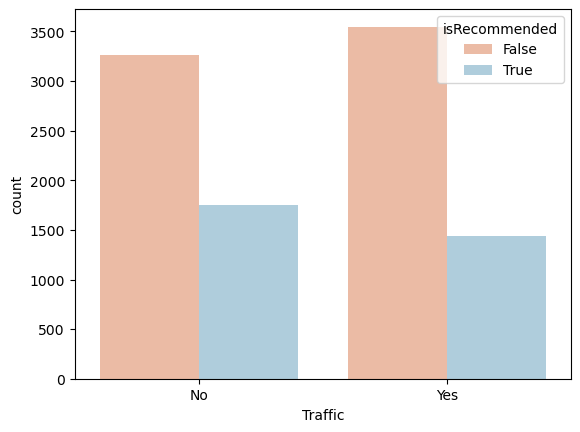

In [7]:
plt.figure()
sns.countplot(x='Traffic', hue='isRecommended', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Veri Ön İşleme

**Label-Encoding**

Veri setimizde bulunan "True", "False" gibi string tipindeki değişkenlerin proje kapsamında kullan kütüphanelerde doğru işlenebilmesi için ilk kısımda import ettiğimiz LabelEncoder aracılığı ile sayısal verilere çevrilmiştir.

In [8]:
#LabelEncoder le değişkenine tanımlanmıştır.
le = LabelEncoder()
#Sayısal verilere yani 1 ve 0 lara dönüştürmek istediğimiz veriler listelenmiştiş, daha sonra LabelEncoder ile veri dönüşümü gerçekleştirilmiştir.
donusturulecek_sutunlar = ["Currency","isWorking","isRecommended","Traffic"]
for i in donusturulecek_sutunlar:
    data[i] = le.fit_transform(data[i])

In [9]:
data.head()

,Distance,Maintenance,Currency,isWorking,isRecommended,Reports,Loading,Traffic,Rating
0,2.3,5,1,1,1,0,2,0,3.1
1,2.1,2,0,1,1,1,7,1,4.3
2,4.6,4,0,0,0,0,3,0,2.9
3,1.4,6,0,1,0,4,2,0,3.0
4,7.7,3,0,0,0,0,5,1,2.8


Encode uyguladığımız veri setinin yeni halini görselleştirmek için head fonksiyonu kullanılmıştır.Burada görüleceği üzere

Yes -> 1

No -> 0

olacak şekilde değişkenler Encode edilmiştir

**Tahminleyici ve Hedef Değişkenleri Ayırma**

Veri setimizde bulunan 9 değişkenin 8 i tahminleyici , Önerilir mi? değişkeni ise hedef değişken olacak şekilde ayırma işlemi uygulanmıştır.

In [10]:
X = data.drop('isRecommended', axis=1)
y = data['isRecommended']


**Eğitim , Test kümelerini Ayırma**

Veri setimizde bulunan verilerin bir kısmı modeli eğitmek için bir kısmı ise modeli test etmek için ayırma işlemi yapılmıştır.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelin Oluşturulması
Proje kapsamında şu modeller kullanılarak deneme yapılmıştır:

LogisticRegression
RidgeClassifier
DecisionTreeClassifier
GaussianNB
MLPClassifier
RandomForestClassifier
Yapılan denemeler sonucunda Çapraz doğrulama(cross validation) gibi çeşitli doğrulama yöntemleri kullanılıp modelin başarısını ölçükten sonra en az hatayla çalışan modelin RandomForestClassifier olduğuna karar verilmiştir.

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#5 katlı çapraz doğrulama uygulanmıştır
cv_scores = cross_val_score(model, X, y, cv=5)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Doğruluk:", cv_scores.mean())
conf_mat = confusion_matrix(y, model.predict(X))
print("Confusion Matrix:")
print(conf_mat)

Çapraz Doğrulama Skorları: [0.9735 0.976  0.975  0.972  0.9765]
Ortalama Doğruluk: 0.9746
Confusion Matrix:
[[6793   19]
 [  30 3158]]


Model daha önce test ve train olarak ayırdığımız veri seti kümelerinden X_train ve y_train ile eğitilmiş daha sonra test kümesi ile test edilmiştir.

In [14]:
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended'])
print("Sınıflandırma Raporu:\n", report)

print(confusion_matrix(y_test, y_pred))

Sınıflandırma Raporu:
                  precision    recall  f1-score   support

Not Recommended       0.98      0.99      0.98      1365
    Recommended       0.97      0.95      0.96       635

       accuracy                           0.98      2000
      macro avg       0.97      0.97      0.97      2000
   weighted avg       0.98      0.98      0.98      2000

[[1346   19]
 [  30  605]]


# Modeli kaydetme

In [15]:
import pickle

filename = 'atm_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


# PROJE ÇALIŞTIRMA

In [16]:
# Modeli yükle
#model2 = pickle.load(open('atm_model.pkl', 'rb'))
import random
# Kullanıcıdan girdi al
#distance = float(input("Uzaklık (km): "))
#maintenance = int(input("Bakım (Ay): "))
#currency = int(input("Döviz (0/1): "))
#working = int(input("Çalışıyor mu? (0/1): ") )
#reports = int(input("Arıza Raporları (0-5): "))
#loading = int(input("Yükleme (Gün Önce, 2-7): "))
#traffic = int(input("Yüksek Trafik (0/1): ") )
#rating = float(input("Kullanıcı Puanı (2.5-5.0): "))

distance = round(random.uniform(0, 8), 1)  # 0-8 km
maintenance = random.randint(2, 6)  # 2-6 ay
rating = round(random.uniform(2.5, 5.0), 1)
reports = random.randint(0, 5)  # 0-5 arıza raporu
traffic = random.randint(0,1)
loading = random.randint(2, 7)  # 2-7 gün önce yükleme
currency = random.randint(0,1)
working = random.randint(0,1)



# Girdiyi DataFrame'e dönüştür
new_data = pd.DataFrame({
  'Distance': [distance],
  'Maintenance': [maintenance],
  'Currency': [currency],
  'isWorking': [working],
  'Reports': [reports],
  'Loading': [loading],
  'Traffic': [traffic],
  'Rating': [rating]
})

#le = LabelEncoder()
#donusturulecek_sutunlar_1 = ["Currency","isWorking","Traffic"]
#for i in donusturulecek_sutunlar_1:
#    new_data[i] = le.fit_transform(new_data[i])
print(new_data)
# Tahmin yap
prediction1 = model.predict(new_data)

# Sonucu yazdır
print(prediction1)

   Distance  Maintenance  Currency  isWorking  Reports  Loading  Traffic  \
0       2.0            4         1          0        0        3        1   

   Rating  
0     3.5  
[0]


In [17]:
atm_distance_data = pd.read_csv("atm_distance.csv")

predictions = []
for index, row in atm_distance_data.iterrows():
    atm_id = row['ATM_ID']
    distance = row['Distance']

    # Generate random values for other features
    maintenance = random.randint(2, 6)  # 2-6 months
    rating = round(random.uniform(2.5, 5.0), 1)
    reports = random.randint(0, 5)  # 0-5 failure reports
    traffic = random.randint(0, 1)
    loading = random.randint(2, 7)  # 2-7 days ago
    currency = random.randint(0, 1)
    working = random.randint(0, 1)

    # Create new data point
    new_data = pd.DataFrame({
        'Distance': [distance],
        'Maintenance': [maintenance],
        'Currency': [currency],
        'isWorking': [working],
        'Reports': [reports],
        'Loading': [loading],
        'Traffic': [traffic],
        'Rating': [rating]
    })

    # Predict
    prediction = model.predict(new_data)[0]
    status = 'Recommended' if prediction == 1 else 'Not Recommended'

    # Store the prediction with all details
    predictions.append({
        'ATM_ID': atm_id,
        'Distance': distance,
        'Maintenance': maintenance,
        'Currency': currency,
        'isWorking': working,
        'Reports': reports,
        'Loading': loading,
        'Traffic': traffic,
        'Rating': rating,
        'Prediction': status
    })

# Convert predictions to DataFrame for better readability
predictions_df = pd.DataFrame(predictions)

# Print predictions
print(predictions_df)

   ATM_ID  Distance  Maintenance  Currency  isWorking  Reports  Loading  \
0     1.0       1.9            5         1          1        5        7   
1     2.0       5.2            2         1          1        5        3   
2     3.0       7.2            3         0          0        0        5   
3     4.0       5.5            6         1          1        2        2   
4     5.0       6.1            2         1          1        1        6   
5     6.0       1.7            2         1          1        1        5   
6     7.0       6.5            3         0          0        1        4   
7     8.0       6.8            2         0          0        3        7   
8     9.0       2.2            6         1          0        3        3   
9    10.0       5.3            4         1          1        5        6   

   Traffic  Rating       Prediction  
0        0     4.8      Recommended  
1        1     4.5      Recommended  
2        0     4.1  Not Recommended  
3        1     2.6  No

FLASK API - GETTING 10 NEAREST ATMs

In [18]:
from flask import Flask, request, jsonify
import requests

app = Flask(__name__)


@app.route('/nearest-atms', methods=['POST'])
def nearest_atms():
    try:
        # Get the CSV content from the request body
        csv_content = request.data.decode('utf-8')

        print(csv_content)

        # Respond with a success message
        return jsonify({"message": "CSV data received successfully"}), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 400


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.16:5000
Press CTRL+C to quit


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
import pickle
import io

app = Flask(__name__)

# Load the trained model
model_filename = 'atm_model.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

@app.route('/nearest-atms', methods=['POST'])
def nearest_atms():
    try:
        # Get the CSV content from the request body
        csv_content = request.data.decode('utf-8')

        # Debugging print statements
        print("Received CSV content:")
        print(csv_content)

        # Convert the CSV content into a DataFrame
        data = pd.read_csv(io.StringIO(csv_content))
        
        # Extract atmId column and keep it for later use
        if 'ATM ID' not in data.columns or 'Distance' not in data.columns:
            return jsonify({"error": "Missing required features in CSV"}), 400

        atm_ids = data['ATM ID']
        
        # Rename columns to match the expected feature names
        data.rename(columns={'Distance': 'Distance'}, inplace=True)
        
        # Add the additional features needed by the model
        data['Maintenance'] = np.random.randint(2, 7, size=len(data))
        data['Rating'] = np.round(np.random.uniform(2.5, 5.0, size=len(data)), 1)
        data['Reports'] = np.random.randint(0, 6, size=len(data))
        data['Traffic'] = np.random.randint(0, 2, size=len(data))
        data['Loading'] = np.random.randint(2, 8, size=len(data))
        data['Currency'] = np.random.choice([True, False], size=len(data))
        data['isWorking'] = np.random.choice([True, False], size=len(data))

        # Ensure the order of features matches the order used during model training
        feature_order = ['Distance', 'Maintenance', 'Currency', 'isWorking', 'Reports', 'Loading', 'Traffic', 'Rating']
        data = data[feature_order]

        # Print the processed data
        print("\nProcessed Data:")
        print(data.to_string(index=False))

        # Use the model to predict the recommended ATM
        predictions = model.predict(data)

        # Respond with the prediction results
        response = pd.DataFrame()
        response['atmId'] = atm_ids
        response['Recommendation'] = predictions
        response['Rating'] = data['Rating']
        response['Currency'] = data['Currency']
        response['Distance'] = data['Distance']


        # Print the prediction results
        print("\nPrediction Results:")
        print(response.to_string(index=False))

        
        return jsonify(response.to_dict(orient='records')), 200
    except Exception as e:
        # Debugging print statement
        print("Error occurred:", str(e))
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
